In [1]:
import tweepy as tw
# Authenticate to Twitter
consumer_key = 'aIUu7CRGvxTcFnFDXAtYgWWxD'
consumer_secret = 'TOnnTfn9R5iBsU06HWOKEhrHG3at2CazOBm9M0LUUsB1QSFA1E'
access_token = '1334970274404511751-lt812xBiTKmkmZWOihk2niP1enp4Hy'
access_token_secret = 'cSXrrgo2l042RE5vHBg2eraa5b0zK0b2ZdbDkEzFnhCrE'
# AUTENTICAÇÃO TWITTER
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
import tweepy
import logging
#from config import create_api
import time
import pyodbc
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-BKH32KF4\SQLEXPRESS;'
                      'Database=TT_Deputados;'
                      'Trusted_Connection=yes;')
sql = 'SELECT * FROM DEPUTADOSFATODIM'
data = pd.read_sql(sql,conn)
data
data['vlrLiquido'] = pd.to_numeric(data['vlrLiquido'], downcast="float")

In [95]:
Usuarios = ["BolsonaroSP","joicehasselmann","celsorussomanno","kimpkat","JoaoCampos","tiriricanaweb","marcelvanhattem","depheliolopes","MarceloFreixo","prisidorio","SargentoFAHUR","capitao_wagner","delegado_waldir","tabataamaralsp","KatiaSastre","samiabomfim","capitao_augusto","FFrancischini_","marcofeliciano","Marceloalvaroan","alessandromolon"]

TweepError: [{'message': 'Application cannot perform write actions. Contact Twitter Platform Operations through https://help.twitter.com/forms/platform.', 'code': 261}]

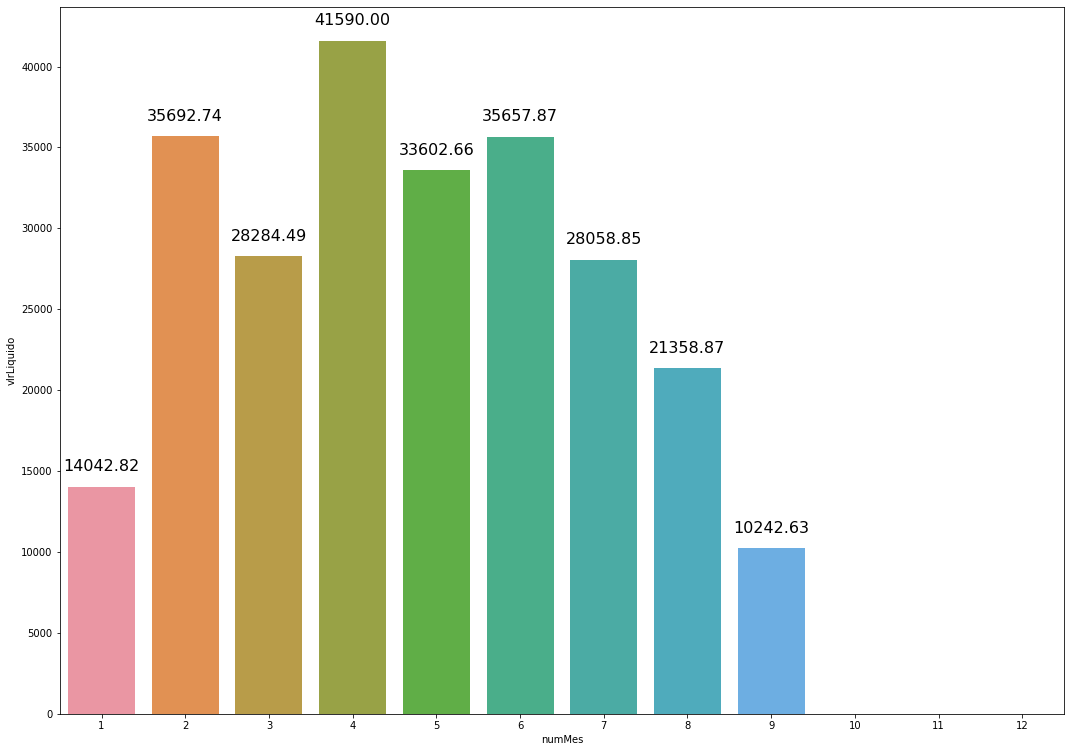

In [99]:
mesqueroda = 202110


for x in range(len(Usuarios)):
    
    #querydeputado
    htgdeputado = "@" + Usuarios[x]
    data['vlrLiquido'] = pd.to_numeric(data['vlrLiquido'], downcast="float")
    datadeputado = data.loc[data['Twitter'] == htgdeputado]
    #datadeputado
    
    
    #Grafico
    plt.figure(figsize=(18, 13))
    g = sns.barplot(x="numMes",y="vlrLiquido",data=datadeputado, estimator=sum, ci=None, 
                order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
    ax = g
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='black', xytext=(0, 20),
                 textcoords='offset points')
    
    endereçosalvamento = r'C:\Users\Romulo\Programação\Python\Scripts\Twitter\TT_Deputados\NovoOrçamento\BancoImagens\{}\teste{}.png'.format(mesqueroda, htgdeputado)
    
    figura = g.get_figure()
    figura.savefig(endereçosalvamento)
    
    filenames = [endereçosalvamento]
    media_ids = []
    for filename in filenames:
        res = api.media_upload(filename)
        media_ids.append(res.media_id)
    
    
    toReply = Usuarios[x] #user to get most recent tweet
    api = tweepy.API(auth)

    #get the most recent tweet from the user
    tweets = api.user_timeline(screen_name = toReply, count=1)

    for tweet in tweets:
        api.update_status("@" + toReply + " novoteste ", in_reply_to_status_id = tweet.id, media_ids=media_ids)
        
    #time.sleep(30)

In [84]:
tweets

[Status(_api=<tweepy.api.API object at 0x000001B04CBC0E80>, _json={'created_at': 'Fri Oct 15 17:24:46 +0000 2021', 'id': 1449063716280995840, 'id_str': '1449063716280995840', 'text': 'RT @abocadelobo: 🚨EMPREGO? Só se for para funcionário laranja das rachadinhas de Bolsonaro!\n\nOs 14 MILHÕES DE DESEMPREGADOS é reflexo da fa…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'abocadelobo', 'name': 'abocadelobo 🇧🇷', 'id': 1379165573398073345, 'id_str': '1379165573398073345', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 45870897, 'id_str': '45870897', 'name': 'Marcelo Freixo', 'screen_name': 'MarceloFreixo', 'location': 'Brasil', 'description': 'Professor de história, deputado fed

In [52]:
type(figura)

matplotlib.figure.Figure

In [48]:
type(figura2)

NoneType

In [ ]:
for x in range(len(Usuarios)):
    htgdeputado = "@" + Usuarios[x]
    data['vlrLiquido'] = pd.to_numeric(data['vlrLiquido'], downcast="float")
    datadeputado = data.loc[data['Twitter'] == htgdeputado]
    #datadeputado
    
    
    #Grafico
    g = sns.barplot(x="numMes",y="vlrLiquido",data=datadeputado, estimator=sum, ci=None, 
                order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
    ax = g
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 20),
                 textcoords='offset points')
    
    figura = g.get_figure()
    figura2 = figura.savefig("output.png", dpi=400, bbox_inches='tight')
    plt.show()
    
    #bot
    toReply = Usuarios[x] #user to get most recent tweet
    api = tweepy.API(auth)

    #get the most recent tweet from the user
    tweets = api.user_timeline(screen_name = toReply, count=1)
    
    filenames = [figura2]
    media_ids = []
    for filename in filenames:
        res = api.media_upload(filename)
        media_ids.append(res.media_id)

    for tweet in tweets:
        api.update_status("@" + toReply + " This is what I'm replying with", in_reply_to_status_id = tweet.id)
        
    time.sleep(30)

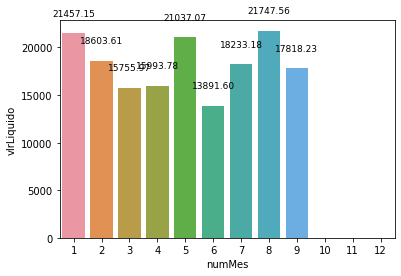

In [39]:
#plt.figure(figsize=(18, 13))
g = sns.barplot(x="numMes",y="vlrLiquido",data=datadeputado, estimator=sum, ci=None, 
                order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

ax = g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [65]:
type(figura)

matplotlib.figure.Figure